In [193]:
!pip install seaborn

In [240]:
!pip install sklearn

    100% |████████████████████████████████| 5.3MB 3.1MB/s ta 0:00:011  2% |▉                               | 133kB 3.6MB/s eta 0:00:02    43% |██████████████                  | 2.3MB 744kB/s eta 0:00:05    98% |███████████████████████████████▌| 5.3MB 3.9MB/s eta 0:00:01
  Running setup.py bdist_wheel for sklearn ... done
  Stored in directory: /root/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [241]:
# disable warnings
import warnings
warnings.filterwarnings('ignore')

In [243]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from pgmpy.inference import VariableElimination
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BicScore
import seaborn as sns
from sklearn import preprocessing

In [196]:
sns.set_style("whitegrid")

## Credit Card Fraud

In [197]:
df = pd.read_csv('../data/171003_df_cleansed.csv')

In [198]:
print(df.shape)
print(df[df['fraudulent'] == 1].shape)

(15487, 126)
(423, 126)


#### Process data

In [199]:
pd.options.display.max_rows = 4000

In [200]:
df['credit_card_holder_and_passenger_similarity_cat'] = pd.cut(df['credit_card_holder_and_passenger_similarity'], bins=6, include_lowest=True)

In [201]:
df['credit_card_min_age_in_days_cat'] = pd.cut(df['credit_card_min_age_in_days'], bins=20, include_lowest=True)

In [202]:
df['flight_price_per_passenger_cat'] = pd.cut(df['flight_price_per_passenger'], bins=30, include_lowest=True)

In [203]:
df['credit_card_min_sales_count_cat'] =  pd.cut(df['credit_card_min_sales_count'], bins=20, include_lowest=True)

In [204]:
df['credit_card_max_sales_count_24h_cat'] =  pd.cut(df['credit_card_max_sales_count_24h'], bins=20, include_lowest=True)

In [205]:
df['flight_hours_to_departure_cat'] =  pd.cut(df['flight_hours_to_departure'], bins=20, include_lowest=True)

In [206]:
df['credit_card_holder_diff_cat'] =  pd.cut(df['credit_card_holder_diff'], bins=5, include_lowest=True)

In [207]:
df['credit_card_last_names_association_count_cat'] = pd.cut(df['credit_card_last_names_association_count'], bins=5, include_lowest=True)

In [208]:
df["flight_origin_destination_iata"] = df["flight_origin_iata"] + df["flight_destination_iata"]

In [209]:
df.credit_card_holder_and_passenger_similarity_cat.unique()

[(0.333, 0.667], (-0.333, 0], (0, 0.333], (0.667, 1], [-1.002, -0.667]]
Categories (5, object): [[-1.002, -0.667] < (-0.333, 0] < (0, 0.333] < (0.333, 0.667] < (0.667, 1]]

In [281]:
#filter features
data = df[[
    'credit_card_holder_and_passenger_similarity_cat',
    'credit_card_min_age_in_days_cat',
#     'flight_price_per_passenger_cat',
#     'credit_card_min_sales_count_cat',
#     'credit_card_max_sales_count_24h_cat',
    'flight_hours_to_departure_cat',
#     'credit_card_holder_diff_cat',
#     'credit_card_last_names_association_count_cat',
#     'flight_origin_destination_iata',
#     'payment_attempts_count',
    'fraudulent',
#     'flight_international',
#     'flight_travel_type'
]]

In [282]:
data = data.dropna()

In [283]:
dict_columns = {}

In [284]:
for column in data.columns:
    le = preprocessing.LabelEncoder()
    le.fit(data[column])
    data[column] = le.transform(data[column]) 
    dict_columns[column] = le.classes_

In [285]:
dict_columns

{'credit_card_holder_and_passenger_similarity_cat': array(['(-0.333, 0]', '(0, 0.333]', '(0.333, 0.667]', '(0.667, 1]',
        '[-1.002, -0.667]'], dtype=object),
 'credit_card_min_age_in_days_cat': array(['(123.9, 165.2]', '(165.2, 206.5]', '(206.5, 247.8]',
        '(247.8, 289.1]', '(289.1, 330.4]', '(330.4, 371.7]',
        '(371.7, 413]', '(41.3, 82.6]', '(413, 454.3]', '(454.3, 495.6]',
        '(495.6, 536.9]', '(536.9, 578.2]', '(578.2, 619.5]',
        '(619.5, 660.8]', '(660.8, 702.1]', '(702.1, 743.4]',
        '(743.4, 784.7]', '(784.7, 826]', '(82.6, 123.9]', '[-0.826, 41.3]'], dtype=object),
 'flight_hours_to_departure_cat': array(['(1294.35, 1725.8]', '(1725.8, 2157.25]', '(2157.25, 2588.7]',
        '(2588.7, 3020.15]', '(3020.15, 3451.6]', '(3451.6, 3883.05]',
        '(3883.05, 4314.5]', '(431.45, 862.9]', '(4314.5, 4745.95]',
        '(4745.95, 5177.4]', '(5177.4, 5608.85]', '(5608.85, 6040.3]',
        '(6040.3, 6471.75]', '(6471.75, 6903.2]', '(6903.2, 7334.65]',


In [286]:
# data['credit_card_holder_and_passenger_similarity_cat'] = data['credit_card_holder_and_passenger_similarity_cat'].cat.codes

# data['credit_card_min_age_in_days_cat'] = data['credit_card_min_age_in_days_cat'].cat.codes

# data['flight_price_per_passenger_cat'] = data['flight_price_per_passenger_cat'].cat.codes

# data['credit_card_min_sales_count_cat'] = data['credit_card_min_sales_count_cat'].cat.codes

# data['credit_card_max_sales_count_24h_cat'] = data['credit_card_max_sales_count_24h_cat'].cat.codes

# data['flight_hours_to_departure_cat'] = data['flight_hours_to_departure_cat'].cat.codes

# data['credit_card_holder_diff_cat'] = data['credit_card_holder_diff_cat'].cat.codes

# data['credit_card_last_names_association_count_cat'] = data['credit_card_last_names_association_count_cat'].cat.codes

# data.fraudulent = data.fraudulent.astype(int)

# data.payment_attempts_count = data.payment_attempts_count.astype(int)

# data.flight_international = data.flight_international.astype(int)

### data.flight_travel_type_codes = data.flight_travel_type.astype(int)


#### Structure learning

In [287]:
hc = HillClimbSearch(data, scoring_method=BicScore(data))
best_model = hc.estimate()
print(best_model.edges())

[('credit_card_holder_and_passenger_similarity_cat', 'credit_card_min_age_in_days_cat'), ('flight_hours_to_departure_cat', 'fraudulent'), ('flight_hours_to_departure_cat', 'credit_card_holder_and_passenger_similarity_cat')]


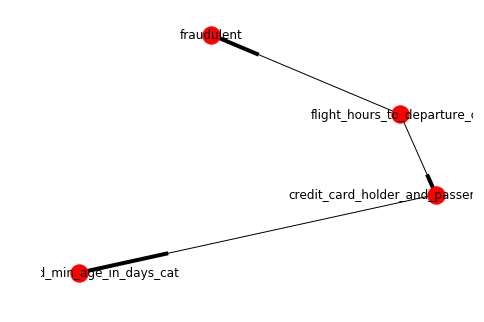

In [288]:
nx.draw(best_model, with_labels=True, pos=graphviz_layout(best_model))
plt.show()

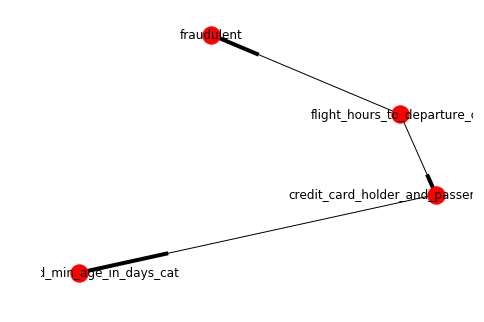

In [289]:
nx.draw(best_model, with_labels=True, pos=graphviz_layout(best_model))
plt.show()

#### Parameter learning

In [290]:
# from pgmpy.estimators import ParameterEstimator
# pe = ParameterEstimator(best_model, data)

In [291]:
from pgmpy.estimators import MaximumLikelihoodEstimator
mle = MaximumLikelihoodEstimator(best_model, data)

In [292]:
best_model.fit(data, estimator=MaximumLikelihoodEstimator)

#### Queries

In [293]:
infer = VariableElimination(best_model)

In [294]:
print(
    infer.query(
        ['fraudulent']
    ) ['fraudulent']
)

╒══════════════╤═══════════════════╕
│ fraudulent   │   phi(fraudulent) │
╞══════════════╪═══════════════════╡
│ fraudulent_0 │            0.9727 │
├──────────────┼───────────────────┤
│ fraudulent_1 │            0.0273 │
╘══════════════╧═══════════════════╛


In [297]:
# Hours to departure: 0, 431.45
print(
    infer.query(
        ['fraudulent'],
        evidence={
            'flight_hours_to_departure_cat': 19
        }
    ) ['fraudulent']
)

╒══════════════╤═══════════════════╕
│ fraudulent   │   phi(fraudulent) │
╞══════════════╪═══════════════════╡
│ fraudulent_0 │            0.9507 │
├──────────────┼───────────────────┤
│ fraudulent_1 │            0.0493 │
╘══════════════╧═══════════════════╛


In [298]:
# Hours to departure 8197.55, 8629

print(
    infer.query(
        ['fraudulent'],
        evidence={
            'flight_hours_to_departure_cat': 17
        }
    ) ['fraudulent']
)

╒══════════════╤═══════════════════╕
│ fraudulent   │   phi(fraudulent) │
╞══════════════╪═══════════════════╡
│ fraudulent_0 │            1.0000 │
├──────────────┼───────────────────┤
│ fraudulent_1 │            0.0000 │
╘══════════════╧═══════════════════╛
